## 03701 HW4

### Amy Ji , Sep 25th 2025

#### 1. Data Input

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read and import data using pandas function
swim_df = pd.read_csv("swim100m.csv")
waist_df = pd.read_excel("Table 2.8 Waist loss.xls")

In [3]:
# The first five rows of swim100m.csv
swim_df.head()

,year,time,sex
0,1905,65.8,M
1,1908,65.6,M
2,1910,62.8,M
3,1912,61.6,M
4,1918,61.4,M


In [4]:
# The last five rows of Table 2.8 Waist loss.xls
waist_df.tail()

,Table 2.8 Waist loss,Unnamed: 1,Unnamed: 2
17,16,103.5,103
18,17,82,80
19,18,101.5,101.5
20,19,103.5,102.6
21,20,93,93


#### 2. First Steps with Pandas

In [5]:
# Create a list of float corresponding to the time stamps: 0 - 10 with a stepsize of 0.1.
timeStamps = np.arange(0,10.1,0.1)
# Calculate the sin and cos value
sinVal = np.sin(2 * np.pi * 1.5 * timeStamps )
cosVal = np.cos(2 * np.pi * 1.5 * timeStamps )


In [6]:
# With the list variables above, generate a df in which x column is time stamps, y column is sine values, and z column is cos values.
df = pd.DataFrame({"time stamps":timeStamps, 
                   "YVals": sinVal, 
                   "ZVals": cosVal})
# show head of the df
df.head()

,time stamps,YVals,ZVals
0,0.0,0.000000,1.000000
1,0.1,0.809017,0.587785
2,0.2,0.951057,-0.309017
3,0.3,0.309017,-0.951057
4,0.4,-0.587785,-0.809017


In [7]:
# Extract data in lines 10-15 from YVals and ZVals
extracted_df = df[["YVals","ZVals"]][10:16]
# Write extracted df to csv
extracted_df.to_csv("output.txt")

In [8]:
# Import matplotlib for plotting.
import matplotlib.pyplot as plt

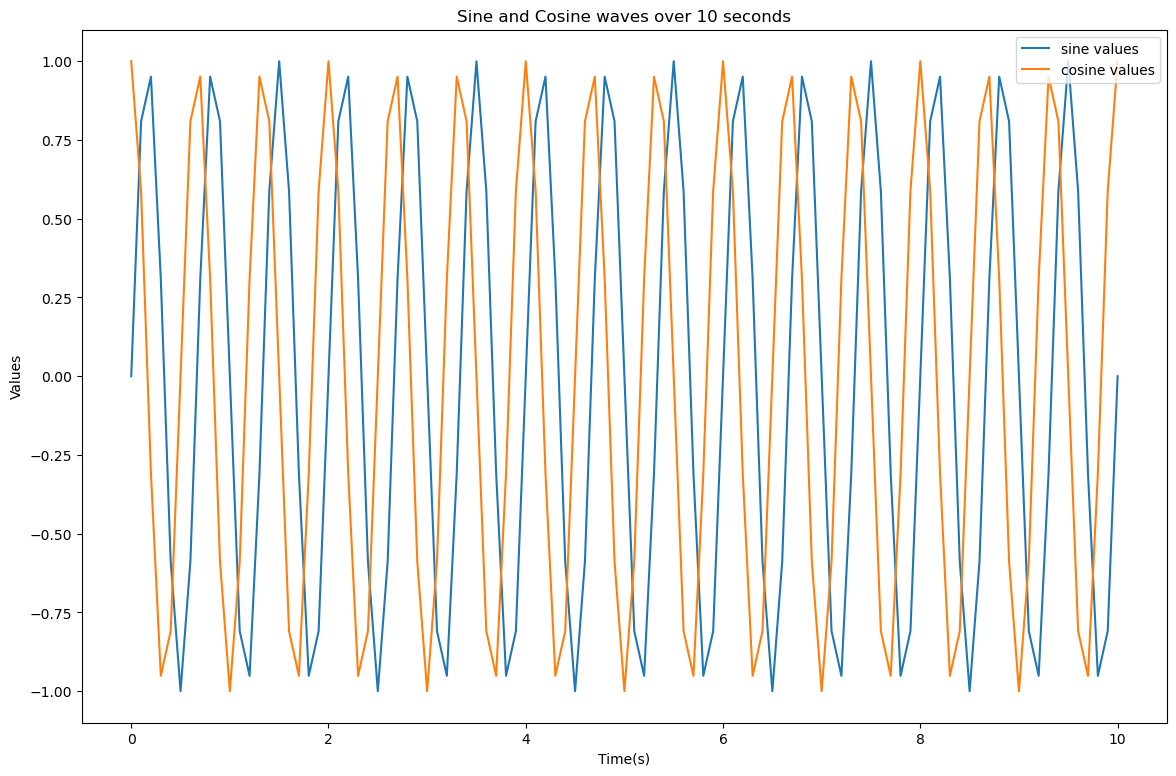

In [9]:
# Create figure 
plt.figure(figsize=(14,9))

# Plot with time stamps on the x-axis and values on the y-axis.
plt.plot(df["time stamps"], df["YVals"], label = "sine values")
plt.plot(df["time stamps"], df["ZVals"], label = "cosine values")

# Create x label, y label, legends and figure title.
plt.xlabel("Time(s)")
plt.ylabel("Values")
plt.title("Sine and Cosine waves over 10 seconds")
plt.legend()

# Display the plot
plt.show()

#### 3. Data Display

In [10]:
# Import babyboom.dat.txt as string df to preserve the format of TOB.
babyboom = pd.read_csv("babyboom.dat.txt", sep = r'\s+', header = None, dtype = str)

In [11]:
# Rename the columns.
babyboom.columns = ["TOB", "Sex", "Weight", "Minutes"]
# Convert the rest of columns back to integers.
babyboom[["Sex", "Weight", "Minutes"]] = babyboom[["Sex","Weight", "Minutes"]].astype(int)

In [12]:
# Replace 1 with Female and 2 with Male.
babyboom["Sex"] = babyboom["Sex"].replace({1:"Female", 2: "Male"})
babyboom.head()

,TOB,Sex,Weight,Minutes
0,0005,Female,3837,5
1,0104,Female,3334,64
2,0118,Male,3554,78
3,0155,Male,3838,115
4,0257,Male,3625,177


In [13]:
# group the plot by sex and describe the statistic.
grouped_babyboom = babyboom.groupby("Sex")
grouped_babyboom.describe()

Weight                                                            \
        count         mean         std     min     25%     50%      75%   
Sex                                                                       
Female   18.0  3132.444444  631.582534  1745.0  2711.0  3381.0  3517.25   
Male     26.0  3375.307692  428.046051  2121.0  3198.0  3404.0  3628.75   

               Minutes                                                        \
           max   count        mean         std   min     25%    50%      75%   
Sex                                                                            
Female  3866.0    18.0  773.000000  446.050775   5.0  507.75  846.5  1094.25   
Male    4162.0    26.0  799.615385  402.687281  78.0  464.25  849.5  1177.50   

                
           max  
Sex             
Female  1435.0  
Male    1283.0

In [14]:
import seaborn

Text(0.5, 1.0, 'Weight distribution of Newborn Babies')

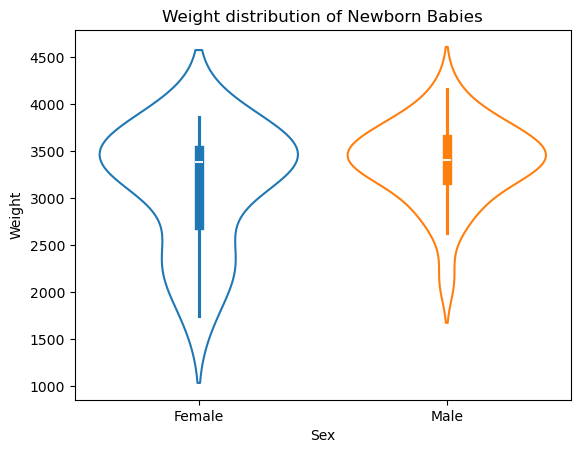

In [15]:
# Graph violin plot using seaborn. Using the hue attribute allow us to combine male and female violin plot.
seaborn.violinplot(x = babyboom["Sex"], y = babyboom["Weight"], hue = babyboom["Sex"], fill = False)
plt.title("Weight distribution of Newborn Babies")

#### 4. Calcium Curve Analysis

In [16]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [21]:
caCurve = pd.read_excel("calcium_curves.xlsx", header = 1)
caCurve.head()

,Intensity Mean,Unit,Category,Channel,Image,Time,Set 1,TrackID,ID
0,817.684021,NaN,Spot,1,Image 1,1,Class B,1000078592,78592
1,734.706970,NaN,Spot,1,Image 1,1,Class B,1000078593,78593
2,769.390015,NaN,Spot,1,Image 1,1,Class B,1000078596,78596
3,743.325012,NaN,Spot,1,Image 1,1,Class B,1000078605,78605
4,753.684021,NaN,Spot,1,Image 1,1,Class B,1000078612,78612


In [26]:
newCurve = pd.DataFrame(caCurve[["Intensity Mean", "Time", "TrackID"]])
newCurve.head()

,Intensity Mean,Time,TrackID
0,817.684021,1,1000078592
1,734.706970,1,1000078593
2,769.390015,1,1000078596
3,743.325012,1,1000078605
4,753.684021,1,1000078612


In [32]:
newCurve = newCurve.sort_values(by = ["TrackID","Time"])
newCurve

,Intensity Mean,Time,TrackID
0,817.684021,1,1000078592
183,866.911987,2,1000078592
371,907.570007,3,1000078592
557,929.346985,4,1000078592
744,912.531982,5,1000078592
...,...,...,...
27829,939.215027,117,1000153651
28101,965.674988,118,1000153651
28372,969.338013,119,1000153651
28636,921.359009,120,1000153651


In [76]:
# Print the unique TrackID in the dataframe.
uniqueID = newCurve["TrackID"].unique()
uniqueID

array([1000078592, 1000078593, 1000078596, 1000078605, 1000078612,
       1000078614, 1000078624, 1000078626, 1000078628, 1000078630,
       1000078634, 1000078635, 1000078646, 1000078659, 1000078664,
       1000078669, 1000078674, 1000078677, 1000078687, 1000078688,
       1000078690, 1000078692, 1000078697, 1000078699, 1000078707,
       1000078709, 1000078711, 1000078712, 1000078719, 1000078720,
       1000078721, 1000078722, 1000078724, 1000078725, 1000078732,
       1000078737, 1000078740, 1000078744, 1000078747, 1000078750,
       1000078754, 1000078757, 1000078758, 1000078759, 1000078760,
       1000078762, 1000078769, 1000078770, 1000078772, 1000078781,
       1000078789, 1000078794, 1000078795, 1000078799, 1000078812,
       1000078814, 1000078823, 1000078829, 1000078836, 1000078838,
       1000078840, 1000078844, 1000078845, 1000078851, 1000078856,
       1000078862, 1000078868, 1000078869, 1000078870, 1000078876,
       1000078877, 1000078881, 1000078894, 1000078897, 1000078

In [41]:
# Count the number of unique TrackID.
newCurve["TrackID"].nunique()

522

In [58]:
# Fetch rows from dataframe with specific TrackID and create a new dataframe to store data points.
ID = newCurve[newCurve["TrackID"] == 1000078624 ]
ID.head()

,Intensity Mean,Time,TrackID
6,737.505981,1,1000078624
191,743.531982,2,1000078624
379,742.171021,3,1000078624
564,751.346008,4,1000078624
751,748.908997,5,1000078624


Text(0.5, 1.0, 'Time Vs Intensity Mean for TrackID 1000078624')

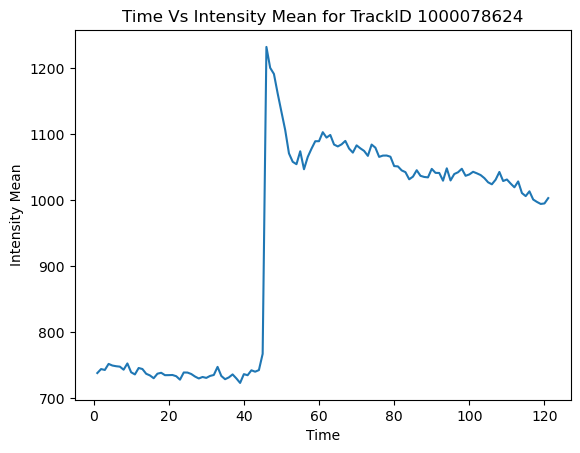

In [110]:
# Graph 
seaborn.lineplot(x = ID["Time"], y = ID["Intensity Mean"])
plt.title("Time Vs Intensity Mean for TrackID 1000078624")

In [79]:
# Generate two random integers from the length of uniqueID array, then use the two random number as index to fetch from uniqueID.
rand_ids = uniqueID[np.random.randint(0, len(uniqueID), size=2)]
rand_ids

array([1000079344, 1000079132])

In [87]:
# Create a new dataframe for all ID1
randID1 = newCurve[newCurve["TrackID"] == rand_ids[0]]
randID1.head()

,Intensity Mean,Time,TrackID
182,705.674011,2,1000079344
370,699.580994,3,1000079344
743,691.794983,5,1000079344
929,701.929993,6,1000079344
1121,692.273010,7,1000079344


In [88]:
# Create a new dataframe for all ID2
randID2 = newCurve[newCurve["TrackID"] == rand_ids[1]]
randID2.head()

,Intensity Mean,Time,TrackID
130,736.263000,1,1000079132
315,724.935974,2,1000079132
503,731.877014,3,1000079132
689,731.505981,4,1000079132
877,730.950012,5,1000079132


Text(0, 0.5, 'Intensity Mean')

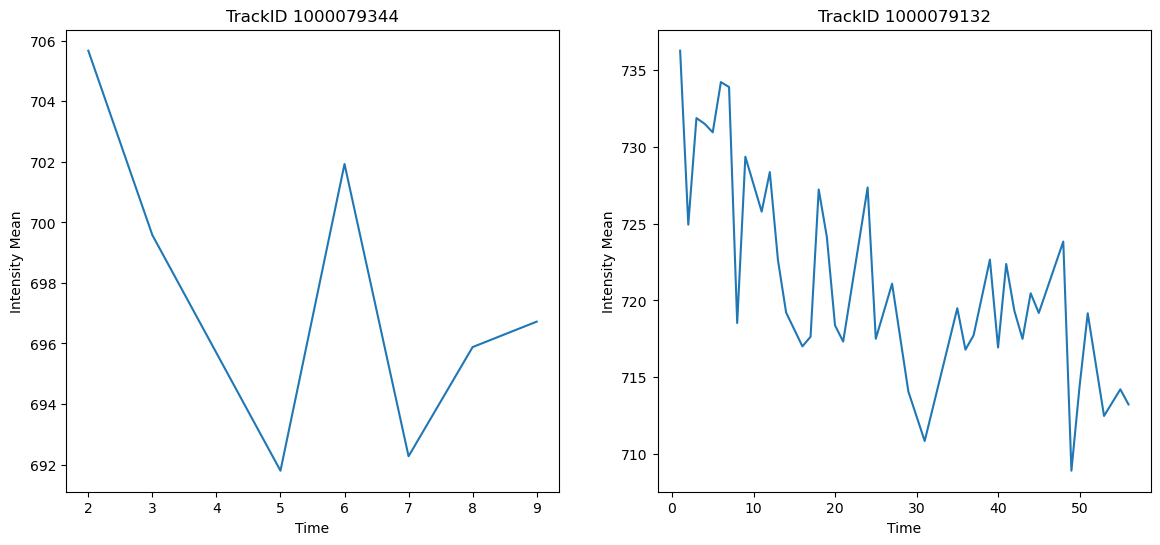

In [109]:
# Pass ID to variable
ID1 = str(rand_ids[0])
ID2 = str(rand_ids[1])

# Create a canvas with two subplots
fig, axs = plt.subplots(1,2, figsize=(14,6))

# Subplot1 on the 0 axs
axs[0].plot(randID1["Time"], randID1["Intensity Mean"])
axs[0].set_title("TrackID "+ID1)
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Intensity Mean")

# Subplot2 on the 1 axs
axs[1].plot(randID2["Time"], randID2["Intensity Mean"])
axs[1].set_title("TrackID " + ID2)
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Intensity Mean")